## 다중선형회귀

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 샘플 데이터 생성
# 공부 시간(X1)과 과외 시간(X2)에 따른 시험 점수(Y) 예측
study_hours = np.array([2, 3, 4, 5, 4, 6, 7, 8, 5, 4])  # 하루 공부 시간
tutor_hours = np.array([0, 1, 0, 2, 1, 3, 2, 3, 2, 1])  # 주간 과외 시간
test_scores = np.array([60, 70, 75, 85, 75, 90, 92, 95, 80, 75])  # 시험 점수

# 입력 데이터 형태 맞추기
X = np.column_stack((study_hours, tutor_hours))

y = test_scores

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 결과 출력
print("회귀 계수:")
print(f"공부 시간: {model.coef_[0]:.2f}")
print(f"과외 시간: {model.coef_[1]:.2f}")
print(f"절편: {model.intercept_:.2f}")

# 새로운 데이터로 예측
new_student = np.array([[6, 2]])  # 공부 6시간, 과외 2시간
prediction = model.predict(new_student)
print(f"\n예측 점수: {prediction[0]:.1f}")

# 모델 성능 평가 (R-squared)
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

회귀 계수:
공부 시간: 4.87
과외 시간: 1.94
절편: 53.39

예측 점수: 86.5
R-squared: 0.9613


데이터 값 확인 : 
X1 [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189

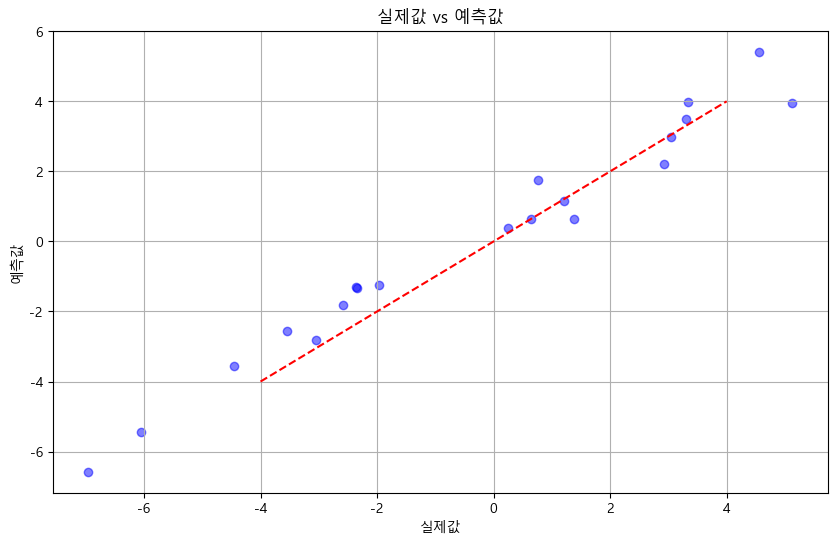


새로운 데이터 예측값: 3.2192


c:\NEWTEST\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

# 샘플 데이터 생성
np.random.seed(42)
n_samples = 100  # 생성할 난수 크기

# 독립변수 생성
X1 = np.random.normal(0, 1, n_samples)   # np.random.normal(평균, 표준편차, 생성할 난수 크기)
X2 = np.random.normal(0, 1, n_samples)
X3 = np.random.normal(0, 1, n_samples)

# 종속변수 생성 (Y = 2X1 + 3X2 + 1.5X3 + 오차)
Y = 2 * X1 + 3 * X2 + 1.5 * X3 + np.random.normal(0, 1, n_samples)

# 데이터프레임 생성
data = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'Y': Y
})
print("데이터 값 확인 : ")
print("X1", X1)
print("X2", X2)
print("X3", X3)
print("Y", Y)
print("data", data)

# 학습용과 테스트용 데이터 분리
X = data[['X1', 'X2', 'X3']]
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 출력
print("회귀 계수:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\n절편: {model.intercept_:.4f}")
print(f"\nR-squared 값: {r2_score(y_test, y_pred):.4f}")
print(f"평균제곱근오차(RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
# 산점도 그리기
plt.plot([-4, 4], [-4, 4], 'r--')  # X축 [-4, 4], Y축 [-4, 4]: 이 부분은 선의 시작점과 끝점을 정의
# y=x 선 그리기
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs 예측값')
plt.grid(True)
plt.show()

# 새로운 데이터로 예측 예시
new_data = np.array([[0.5, 1.0, -0.5]])
prediction = model.predict(new_data)
print(f"\n새로운 데이터 예측값: {prediction[0]:.4f}")

   hour  score
0   0.5     10
1   1.2      8
2   1.8     14
3   2.4     26
4   2.6     22
[[ 0.5]
 [ 1.2]
 [ 1.8]
 [ 2.4]
 [ 2.6]
 [ 3.2]
 [ 3.9]
 [ 4.4]
 [ 4.5]
 [ 5. ]
 [ 5.3]
 [ 5.8]
 [ 6. ]
 [ 6.1]
 [ 6.2]
 [ 6.9]
 [ 7.2]
 [ 8.4]
 [ 8.6]
 [10. ]]
[ 10   8  14  26  22  30  42  48  38  58  60  72  62  68  72  58  76  86
  90 100]
[  5.00336377  12.31395163  18.58016979  24.84638795  26.93512734
  33.20134551  40.51193337  45.73378184  46.77815153  52.
  55.13310908  60.35495755  62.44369694  63.48806663  64.53243633
  71.84302419  74.97613327  87.5085696   89.59730899 104.2184847 ]


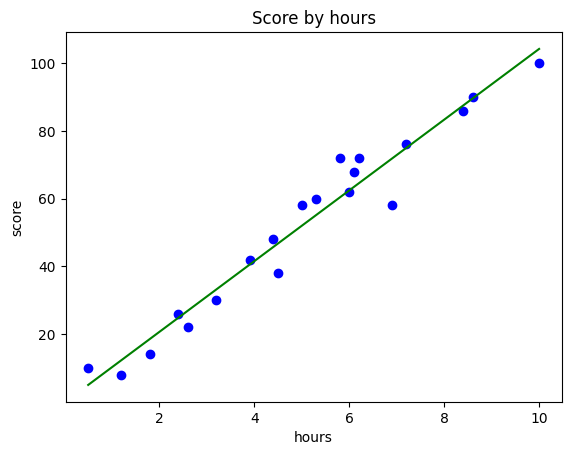

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv('./dataset/LinearRegressionData.csv')

print(dataset.head())

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(X)
print(y)

reg = LinearRegression()
reg.fit(X,y)

y_pred = reg.predict(X)
print(y_pred)

plt.scatter(X,y, color='blue')
plt.plot(X, y_pred, color='green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

## 경사하강법

-- Epoch 1
Norm: 0.41, NNZs: 1, Bias: 0.063114, T: 20, Avg. loss: 1637.661721
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.67, NNZs: 1, Bias: 0.105122, T: 40, Avg. loss: 1535.121058
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.90, NNZs: 1, Bias: 0.141044, T: 60, Avg. loss: 1459.324512
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.10, NNZs: 1, Bias: 0.173554, T: 80, Avg. loss: 1394.172266
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.29, NNZs: 1, Bias: 0.203258, T: 100, Avg. loss: 1336.007398
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.46, NNZs: 1, Bias: 0.231002, T: 120, Avg. loss: 1283.535111
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.63, NNZs: 1, Bias: 0.257074, T: 140, Avg. loss: 1235.318395
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.78, NNZs: 1, Bias: 0.281762, T: 160, Avg. loss: 1190.704566
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.93, NNZs: 1, Bias: 0.305269, T: 180, Avg. loss: 1149.134762
Total trainin

c:\NEWTEST\.venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


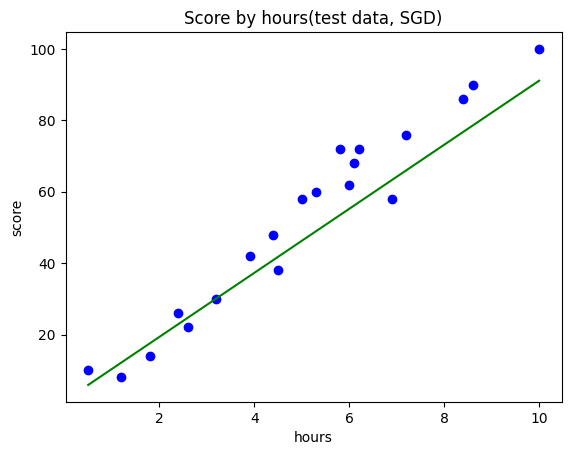

In [ ]:
"""
경사 : 실제값과 예측값의 오차
경사하강법 : 오차를 줄이는 방향으로 모델을 학습시키는 방법
"""


from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1)
# max_iter : 모델 학습 횟수, eta0 : 학습율(1e-4: 0.0001), versbose=1 학습결과출력
sr.fit(X, y)
# loss값(오차값)이 점점 줄어드는 걸 알 수 있다

plt.scatter(X,y, color='blue')
plt.plot(X, sr.predict(X), color='green')
plt.title('Score by hours(test data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()
# 선 그래프가 위와 약간 다름

## 로지스틱회귀

   hour  pass
0   0.5     0
1   1.2     0
2   1.8     0
3   2.4     0
4   2.6     0
X :
[[ 0.5]
 [ 1.2]
 [ 1.8]
 [ 2.4]
 [ 2.6]
 [ 3.2]
 [ 3.9]
 [ 4.4]
 [ 4.5]
 [ 5. ]
 [ 5.3]
 [ 5.8]
 [ 6. ]
 [ 6.1]
 [ 6.2]
 [ 6.9]
 [ 7.2]
 [ 8.4]
 [ 8.6]
 [10. ]]
y :
[0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1]
X_train :
[[5.3]
 [8.4]
 [3.9]
 [6.1]
 [2.6]
 [1.8]
 [3.2]
 [6.2]
 [5. ]
 [4.4]
 [7.2]
 [5.8]
 [2.4]
 [0.5]
 [6.9]
 [6. ]]
X_test :
[[ 8.6]
 [ 1.2]
 [10. ]
 [ 4.5]]
y_train :
[1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1]
y_test :
[1 0 1 0]
6에 대한 예측값
[1]
6에 대한 예측확률
[[0.141483 0.858517]]
4에 대한 예측값
[0]
4에 대한 예측확률
[[0.62497682 0.37502318]]
X_range : 
[[ 8.6]
 [ 1.2]
 [10. ]
 [ 4.5]]
y_pred : 
[1 0 1 1]
y_test : 
[1 0 1 0]
정확도
0.75
0.1 간격으로 X의 최소값부터 최대값까지의 배열
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.
 4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8
 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8

C:\Users\humna-20\AppData\Local\Temp\ipykernel_7364\3472941411.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


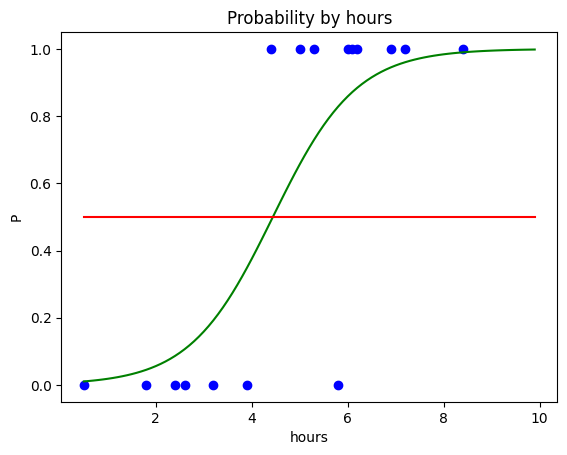

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 : 결과를 0 또는 1로 분류

dataset = pd.read_csv('./dataset/LogisticRegressionData.csv')
print(dataset.head())

X = dataset.iloc[:, :-1].values
print("X :")
print(X)
y = dataset.iloc[:, -1].values
print("y :")
print(y)    # 결과값이 0 또는 1임

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train :")
print(X_train)
print("X_test :")
print(X_test)
print("y_train :")
print(y_train)
print("y_test :")
print(y_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

print("6에 대한 예측값")
print(classifier.predict([[6]]))
print("6에 대한 예측확률")
print(classifier.predict_proba([[6]]))

print("4에 대한 예측값")
print(classifier.predict([[4]]))
print("4에 대한 예측확률")
print(classifier.predict_proba([[4]]))

y_pred = classifier.predict(X_test)
print("X_range : ")
print(X_test) # 테스트 데이터
print("y_pred : ")
print(y_pred) # 예측값
print("y_test : ")
print(y_test) # 실제값

print("정확도")
print(classifier.score(X_test, y_test))


"""선그래프를 그리기 위한 코드"""
X_range = np.arange(min(X), max(X), 0.1)
print("0.1 간격으로 X의 최소값부터 최대값까지의 배열")
print(X_range)
p = 1/(1+ np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))
print("로지스틱 함수")
print(p)

print("X_range의 배열 크기")
print(X_range.shape)

p = p.reshape(-1) # 1차원 배열로 변환
print("p의 배열 크기")
print(p.shape)


""" 그래프 그리기 """
plt.scatter(X_train, y_train, color='blue')
# 훈련 데이터 산점도
plt.plot(X_range, p, color='green')
# 로지스틱 함수 그래프
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # y축에 일정한 값인 0.5를 유지하는 직선
# 0.5 기준선
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()